# Tema da prática

```{admonition} Objetivos
:class: important

1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
```

```{admonition} Antes de começar
:class: seealso

* Revise a aula: {ref}`aula`
* Leia o capítulo X de {cite:t}`holdgraf_evidence_2014`
```

## Bibliotecas

Vamos primeiro carregar as bibliotecas que vamos utilizar nessa prática.

In [2]:
import numpy as np
import xarray as xr
import ensaio
import harmonica as hm
import pygmt

## Dados

In [3]:
caminho = ensaio.fetch_lightning_creek_magnetic(version=1)

In [4]:
dados = xr.load_dataset(caminho)
dados

<xarray.Dataset>
Dimensions:              (easting: 346, northing: 370)
Coordinates:
  * easting              (easting) float64 4.655e+05 4.656e+05 ... 4.828e+05
  * northing             (northing) float64 7.576e+06 7.576e+06 ... 7.595e+06
    height               (northing, easting) float64 500.0 500.0 ... 500.0 500.0
Data variables:
    total_field_anomaly  (northing, easting) float32 35.0 36.2 ... -16.0 -35.8

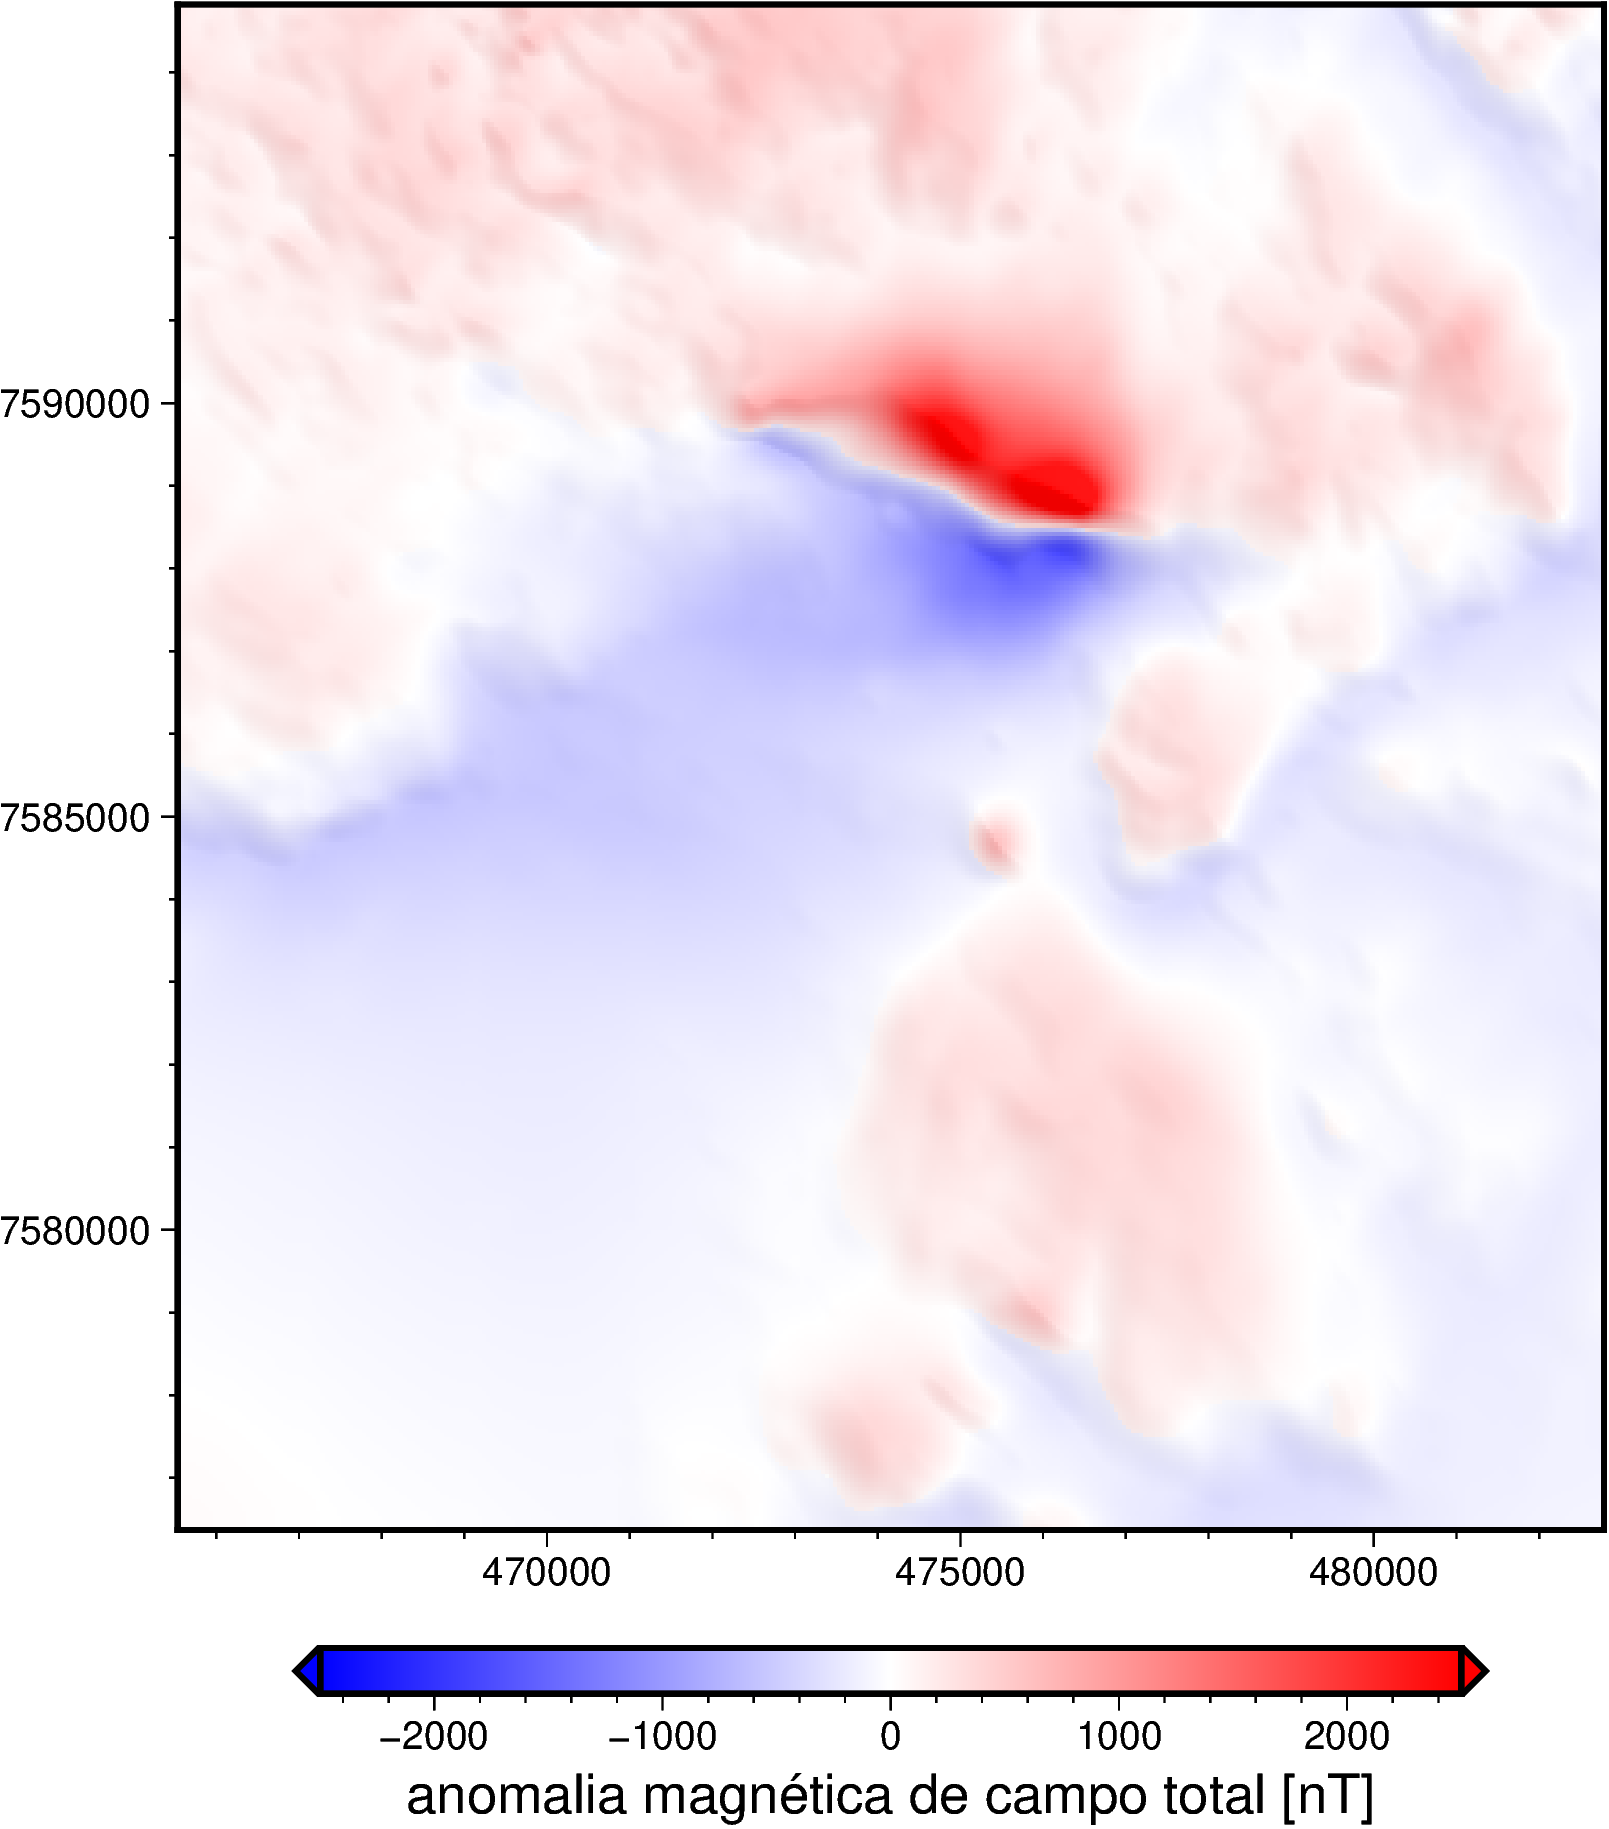

In [5]:
fig = pygmt.Figure()
scale = 2500
pygmt.makecpt(cmap="polar+h", series=[-scale, scale], background=True)
fig.grdimage(
    grid=dados.total_field_anomaly,
    cmap=True,
    shading="+a45+nt0.1",
    projection="x0.0007c",
    frame="af",
)
fig.colorbar(
    frame='af+l"anomalia magnética de campo total [nT]"',
    position="JBC+h+o0/1c+e",
)
fig.show()

## Continuação

In [6]:
continuado = hm.upward_continuation(dados.total_field_anomaly, height_displacement=500)
continuado

/home/leo/bin/conda/envs/aula2023/lib/python3.10/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)


<xarray.DataArray (northing: 370, easting: 346)>
array([[17.90147533, 22.08675673, 26.23764562, ...,  6.08891188,
         9.8118593 , 13.7775522 ],
       [13.72268135, 17.90452995, 22.03705793, ...,  1.8017468 ,
         5.58291921,  9.58412417],
       [ 9.5385792 , 13.73247714, 17.86130833, ..., -2.53601784,
         1.31759268,  5.3696446 ],
       ...,
       [29.55438492, 33.88952563, 38.22027634, ..., 17.58967061,
        21.30263398, 25.32246077],
       [25.90060519, 30.1585931 , 34.40557155, ..., 14.08416877,
        17.76595566, 21.73494674],
       [21.98981519, 26.19898745, 30.38686892, ..., 10.2187922 ,
        13.90599701, 17.85871254]])
Coordinates:
  * northing  (northing) float64 7.576e+06 7.576e+06 ... 7.595e+06 7.595e+06
  * easting   (easting) float64 4.655e+05 4.656e+05 ... 4.827e+05 4.828e+05

::::{admonition} **Sua vez!** 🧘
:class: tip

Faça uma figura do dado continuado.

:::{admonition} Dica
:class: note dropdown

* Faça assim
* Tente isso
:::

:::{admonition} Solução
:class: warning dropdown
```python
fig = pygmt.Figure()
scale = 2500
pygmt.makecpt(cmap="polar+h", series=[-scale, scale], background=True)
fig.grdimage(
    grid=continuado,
    cmap=True,
    shading="+a45+nt0.1",
    projection="x0.0007c",
    frame="af",
)
fig.colorbar(
    frame='af+l"anomalia magnética continuada [nT]"',
    position="JBC+h+o0/1c+e",
)
fig.show()
```
:::
::::